In [9]:
import numpy as np
from scipy import polyfit
import matplotlib.pyplot as plt
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve
#from numpy.polynomial.hermite import herm2poly
#from numpy.polynomial.hermite import hermfit, hermval
%matplotlib inline

In [10]:
def lfun(xvals,jj,x):
    lval = np.ones(x.size)
    xjj = xvals[jj]
    xrem = xvals[:jj]
    xrem = np.append(xrem,xvals[jj+1:])
    denom = np.prod(xjj - xrem)
    for val in xrem:
        lval *= (x-val)
    return lval/denom

def lagran_interp(xvals,fvals,x):
    n = fvals.size
    ipoly = np.zeros(x.size)
    for jj in range(n):
        ipoly += fvals[jj]*lfun(xvals,jj,x)
    return ipoly


**Problem 1**: 10 pts - For the function

$$
f(x) = \frac{x^{2}}{1+x^{4}}, ~ -1 \leq x \leq 1
$$

a) (2pts) Using an equispaced set of $10$ nodes, generate the Lagrange interpolating polynomial to $f(x)$.  Generate a plot which shows how the error in your approximation varies over the interval.  

b) (2pts) Using an equispaced set of $20$ nodes, generate the Lagrange interpolating polynomial to $f(x)$.  Generate a plot which shows how the error in your approximation varies over the interval.  

c) (2pts) At what number of equispaced nodes does your Lagrange interpolation approximation break down?  

d) (4pts) Does using Chebyshev points help resolve the issues you saw in c) ?  Provide examples to verify your claim.

_Answer_

In [11]:
#(a)
def fp1(x):
    num = np.power(x, 2)
    demon = 1 + np.power(x, 4)
    return num/demon
xinterp = np.linspace(-1,1, int(1e3)+1)
ftrue = fp1(xinterp)
def inter_plot(xinterp, ftrue, n):
    xvals = xinterp[::int(1e3/n)]
    fvals = ftrue[::int(1e3/n)]
    finterp = lagran_interp(xvals,fvals,xinterp)
    plt.plot(xinterp,np.ma.log10(np.abs(ftrue-finterp)),ls='-',color='k')
    plt.xlabel("x")
    plt.ylabel("$log10|error|$")
    n = str(n)
    plt.title("Lagrange interpolating polynomial using: " +n + " nodes")

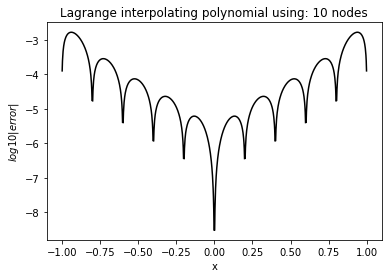

In [12]:
n=10
inter_plot(xinterp, ftrue, n)

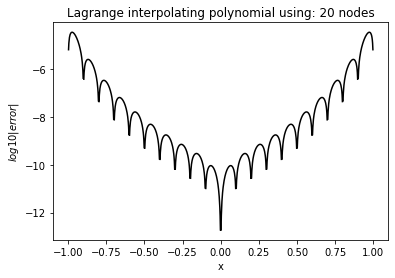

In [13]:
n=20
inter_plot(xinterp, ftrue, n)

After that when we use around 60 nodes and it no longer works. The error begins to have a log error >0. So at this point a greater number of nodes make the error much worse rather better.

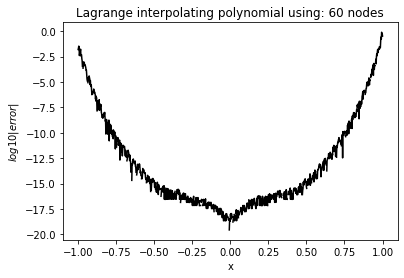

In [14]:
n=60
inter_plot(xinterp, ftrue, n)
#does not work well error becomes positive

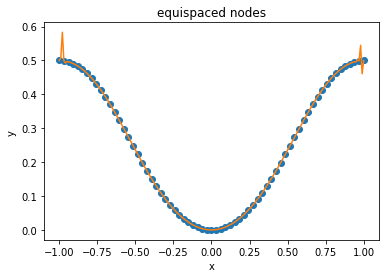

In [15]:
n = 67
xvali = np.linspace(-1, 1, n)
yvali = fp1(xvali)
xnew = np.linspace(-1, 1, 200) 
ynew = lagran_interp(xvali,yvali,xnew)
plt.plot(xvali, yvali, 'o', xnew, ynew, '-')
plt.title("")
plt.xlabel("x")
plt.ylabel("y ")
plt.title("equispaced nodes")
plt.show()   

we see the end points are getting far from accurate. 

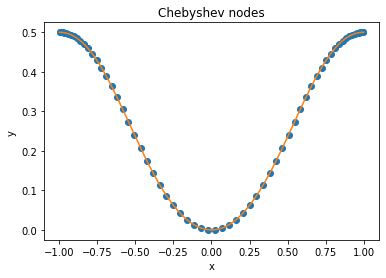

In [16]:
xch = [np.cos(np.pi*(2*k+1)/(2*n+2)) for k in range(1, int(n))]
ych = fp1(xch)
xnew = np.linspace(-1, 1, 200) 
ynew = fp1(xnew)
funlag = lagran_interp(xch,ych,xnew)
plt.plot(xch, ych, 'o', xnew, ynew, '-')
plt.title("Chebyshev nodes")
plt.xlabel("x")
plt.ylabel("y ")
plt.show()


Above is using difference nodes by implementing Chebyshev points or nodes, which are given by 

$$
x_{j} = \cos\left(\frac{2j+1}{2n+2}\pi\right), ~ j=0,\cdots,n
$$

Text(0, 0.5, '$log10|error|$ ')

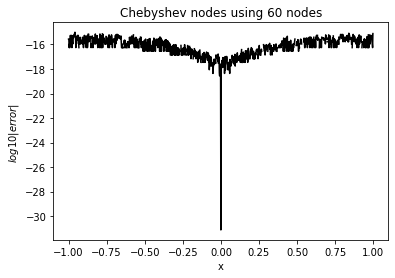

In [17]:
ncheb = 60
xcheb = [np.cos(np.pi*(2*j+1)/(2*ncheb+2)) for j in range(0, ncheb+1)]
fcheb = fp1(xcheb)
finterp = lagran_interp(xcheb,fcheb,xinterp)
#plt.plot(xcheb, fcheb, 'o', xinterp, finterp)
plt.plot(xinterp,np.ma.log10(np.abs(ftrue-finterp)),ls='-',color='k')
plt.title("Chebyshev nodes using 60 nodes")
plt.xlabel("x")
plt.ylabel("$log10|error|$ ")

**Problem 2**: 10 pts - For the basis functions of Lagrange interpolation, $L^{(n)}_{j}(x)$, where 

$$
L^{(n)}_{j}(x) = \prod_{l=0, ~l\neq j}^{n}\frac{(x-x_{l})}{(x_{j}-x_{l})}
$$

a) (3pts) Show that 

$$
\frac{d}{dx} L^{(n)}_{j}(x) = \frac{1}{\prod_{l=0,~l\neq j}^{n} (x_{j}-x_{l})}~\sum_{l=0,~l\neq j}^{n}~ \prod_{m=0,~m\neq l, ~ m\neq j}^{n}(x-x_{m})
$$

b) (2pts) From this, find that 

$$
\frac{d}{dx} L^{(n)}_{j}(x_{k}) = \left\{ \begin{array}{rl} \sum_{l=0, ~ l\neq j}^{n}\frac{1}{x_{j}-x_{l}} & k=j \\
& \\
\frac{\prod_{m=0,~m\neq j,~m\neq k}^{n} (x_{k}-x_{m})}{\prod_{l=0,~l\neq j}^{n} (x_{j}-x_{l})} & k\neq j
\end{array}\right.
$$

c) (2pts) If we suppose the Lagrange polynomial $P_{n}(x)$ is given by 

$$
P_{n}(x) = \sum_{j=0}^{n}f_{j}L^{(n)}_{j}(x),
$$

so that $P_{n}(x)\approx f(x)$, $f_{j}=f(x_{j})$, provide a brief explanation of how the formulas in part (b) allow you to generate finite-difference approximations to $f'(x_{j})$ for any number of points with any type of interpoint spacing.  

d) (3pts) Given the data $\left\{x_{j-1},f_{j-1},x_{j},f_{j},x_{j+1},f_{j+1},x_{j+2},f_{j+2}\right\}$, where 

$$
\delta x = x_{j}-x_{j-1}=x_{j+1}-x_{j}=x_{j+2}-x_{j+1} 
$$ 

derive the _forward-difference approximation_ to $f'(x_{j})\approx P_{2}'(x_{j})$ where

$$
P_{2}(x) = f_{j}L^{(2)}_{j}(x) + f_{j+1}L^{(2)}_{j+1}(x) + f_{j+2}L^{(2)}_{j+2}(x).
$$

How does your forward-difference approximation to $f'(x_{j})$ differ from the centered-difference approximation to $f'(x_{j})$ given by 

$$
f'(x_{j}) \approx \frac{1}{2\delta x}\left(f_{j+1} - f_{j-1}\right).
$$

When might you use one or the other?

(a) we know that:
$$
L^{(n)}_{j}(x) = \prod_{l=0, ~l\neq j}^{n}\frac{(x-x_{l})}{(x_{j}-x_{l})}
$$

Then, 
$$
ln(L^{(n)}_{j}(x)) = ln(\prod_{l=0, ~l\neq j}^{n}\frac{(x-x_{l})}{(x_{j}-x_{l})}) = ~\sum_{l=0,~l\neq j}^{n}~ ln(\frac{(x-x_{l})}{(x_{j}-x_{l})})
$$

Hence, 
$$
\frac{L'^{(n)}_{j}(x)}{L^{(n)}_{j}(x)}=  ~\sum_{l=0,~l\neq j}^{n}~ \frac{\frac{1}{(x_{j}-x_{l})}}{\frac{(x-x_{l})}{(x_{j}-x_{l})}} =  ~\sum_{l=0,~l\neq j}^{n}~ \frac{1}{x-x_{l}}
$$

So, 
$$
L'^{(n)}_{j}(x) = L^{(n)}_{j}(x) \cdot ~\sum_{l=0,~l\neq j}^{n}~ \frac{1}{x-x_{l}} = \prod_{l=0, ~l\neq j}^{n}\frac{(x-x_{l})}{(x_{j}-x_{l})} \cdot ~\sum_{l=0,~l\neq j}^{n}~ \frac{1}{x-x_{l}} 
$$

Therefore, 
$$
\frac{d}{dx} L^{(n)}_{j}(x) = \frac{1}{\prod_{l=0,~l\neq j}^{n} (x_{j}-x_{l})}~\sum_{l=0,~l\neq j}^{n}~ \prod_{m=0,~m\neq l, ~ m\neq j}^{n}(x-x_{m})
$$

(b) $$
\frac{d}{dx} L^{(n)}_{j}(x_{k}) = \frac{1}{\prod_{l=0,~l\neq j}^{n} (x_{j}-x_{l})}~\sum_{l=0,~l\neq j}^{n}~ \prod_{m=0,~m\neq l, ~ m\neq j}^{n}(x_{k}-x_{m})
$$
If $k = j$ 
Then, 
$$
\frac{d}{dx} L^{(n)}_{j}(x_{k}) = \frac{d}{dx} L^{(n)}_{j}(x_{j}) = \prod_{l=0, ~l\neq j}^{n}\frac{(x_{j}-x_{l})}{(x_{j}-x_{l})} \cdot ~\sum_{l=0,~l\neq j}^{n}~ \frac{1}{x-x_{l}}  = ~\sum_{l=0,~l\neq j}^{n}~ \frac{1}{x-x_{l}}
$$
If $k \neq j$
Then,
$$
\frac{d}{dx} L^{(n)}_{j}(x_{k}) =\frac{d}{dx} L^{(n)}_{j}(x_{j}) = \prod_{l=0, ~l\neq j}^{n}\frac{(x_{k}-x_{l})}{(x_{j}-x_{l})} \cdot ~\sum_{l=0,~l\neq j}^{n}~ \frac{1}{x-x_{l}} = \frac{\prod_{m=0,~m\neq j,~m\neq k}^{n} (x_{k}-x_{m})}{\prod_{l=0,~l\neq j}^{n} (x_{j}-x_{l})}
$$
Hence, 

$$
\frac{d}{dx} L^{(n)}_{j}(x_{k}) = \left\{ \begin{array}{rl} \sum_{l=0, ~ l\neq j}^{n}\frac{1}{x_{j}-x_{l}} & k=j \\
& \\
\frac{\prod_{m=0,~m\neq j,~m\neq k}^{n} (x_{k}-x_{m})}{\prod_{l=0,~l\neq j}^{n} (x_{j}-x_{l})} & k\neq j
\end{array}\right.
$$


(c) Suppose the Lagrange polynomial $P_{n}(x)$ is given by 

$$
P_{n}(x) = \sum_{j=0}^{n}f_{j}L^{(n)}_{j}(x),
$$

so that $P_{n}(x)\approx f(x)$, $f_{j}=f(x_{j})$, Then, by the formula above to generate $f'(x_{j})$ we will use $P'_{n}(x)$ which is dependent on 
$L'^{(n)}_{j}(x)$. As we can see in the results of (b) L' is continuous for all x in the interval we choose to interpolate. In addition, L' does not depend on the spacing of our interpolation points. Hence, we can use Chebyshev points or nodes if needed. 

(d) We know that 
$$
L^{(2)}_{j}(x) = \frac{(x-x_{j+1})(x-x_{j+2})}{(x_{j}-x_{j+1})(x_{j}-x_{j+2})},\\
~ L^{(2)}_{j+1}(x) = \frac{(x-x_{j})(x-x_{j+2})}{(x_{j+1}-x_{j})(x_{j+1}-x_{j+2})}, \\
~ L^{(2)}_{j+2}(x) = \frac{(x-x_{j})(x-x_{j+1})}{(x_{j+2}-x_{j+1})(x_{j+2}-x_{j})}.
$$
Then,
$$
\frac{d}{dx} L^{(2)}_{j}(x) = \frac{(2x-x_{j+1}-x_{j+2})}{(x_{j}-x_{j+1})(x_{j}-x_{j+2})},\\
\frac{d}{dx} L^{(2)}_{j+1}(x) = \frac{(2x-x_{j}-x_{j+2})}{(x_{j+1}-x_{j})(x_{j+1}-x_{j+2})},\\ 
\frac{d}{dx}  L^{(2)}_{j+2}(x) = \frac{(2x-x_{j}-x_{j+1})}{(x_{j+2}-x_{j+1})(x_{j+2}-x_{j})}.
$$
So,
$$
\frac{d}{dx} L^{(2)}_{j}(x_{j}) = \frac{(2x_{j}-x_{j+1}-x_{j+2})}{(x_{j}-x_{j+1})(x_{j}-x_{j+2})} = \frac{(-3\delta x)}{(-\delta x)(-2 \delta x)} = \frac{-3}{2\delta x},\\
\frac{d}{dx} L^{(2)}_{j+1}(x_{j}) = \frac{(2x_{j}-x_{j}-x_{j+2})}{(x_{j+1}-x_{j})(x_{j+1}-x_{j+2})} = \frac{(-2\delta x)}{(\delta x)(-\delta x)} = \frac{2}{\delta x},\\
\frac{d}{dx}  L^{(2)}_{j+2}(x) = \frac{(2x_{j}-x_{j}-x_{j+1})}{(x_{j+2}-x_{j+1})(x_{j+2}-x_{j})} = \frac{(-\delta x)}{(\delta x)(2 \delta x)} = \frac{1}{2\delta x}
$$

Hence, 

$$
f'(x_{j}) \approx \frac{-3}{2\delta x} f_{j} + \frac{2}{\delta x} f_{j+1} + \frac{1}{2\delta x} f_{j+2} = \frac{1}{\delta x} ( \frac{-3}{2} f_{j}+ 2f_{j+1} + \frac{1}{2}f_{j+2})
$$


The result above which is forward-difference approximation to $f'(x_{j})$ differ from the centered-difference approximation to $f'(x_{j})$ given by 

$$
f'(x_{j}) \approx \frac{1}{2\delta x}\left(f_{j+1} - f_{j-1}\right).
$$
This is becuase when we forward difference approximation we use all 3 f values to get our f', whereas when we use the centered difference we only use 2 f values. 

When should we use one or the other?
Usually the central difference error is more accurate than the forward difference. Therefore, most times you would prefer to use central method. Yet, if you have bounded nodes then central would not be an option, you will have to use either forward or backwards approximation. 

**Problem 3**: 10 pts - Suppose I give you the data $\left\{x_{j},f_{j},s_{j}\right\}_{j=0}^{n}$, where I want to find a polynomial of degree $m$, say $P_{m}(x)$, where

$$
P_{m}(x) = \sum_{l=0}^{m}p_{l}x^{l} = p_{0} + p_{1}x + \cdots + p_{m}x^{m}, 
$$

such that 

$$
P_{m}(x_{j}) = f_{j}, ~ P'_{m}(x_{j}) = s_{j}, ~ j=0,\cdots, n.
$$

Thus, if we want $P_{m}(x)\approx f(x)$, we ask not only that $P_{m}(x)$ interpolate $f(x)$ at $x_{j}$ so that $f(x_{j})=P_{m}(x_{j}) = f_{j}$, we also require that we match the slopes so that $f'(x_{j}) = P_{m}'(x_{j}) = s_{j}$.  This approximation is called _Hermite Interpolation_.

a) (1pt) How many equations do I need to solve in this interpolation problem?  What degree of polynomial do I need to choose in order to find a unique solution to my interpolation problem?

b) (2pts) Suppose we set our approximating polynomial $P_{2n+1}(x)$ to be 

$$
P_{2n+1}(x) = \sum_{l=0}^{n}f_{l}H_{l,n}(x) + \sum_{l=0}^{n}s_{l}\tilde{H}_{l,n}(x), 
$$

where the degree of the polynomials $H_{l,n}(x)$ and $\tilde{H}_{l,n}(x)$ are $2n+1$.  Show that we need these polynomials to satisfy the requirements

$$
H_{l,n}(x_{k}) = \delta_{kl}, ~ H'_{l,n}(x_{k}) = 0, ~ \tilde{H}_{l,n}(x_{k}) = 0, ~ \tilde{H}'_{l,n}(x_{k}) = \delta_{kl},
$$

where 

$$
\delta_{kl} = \left\{\begin{array}{rl} 1 & k=l \\ 0 & k\neq l\end{array} \right.
$$

c) (3pts) Show the formulas 

$$
H_{l,n}(x) = \left(1 - 2(x-x_{l})\frac{d}{dx}L^{(n)}_{l}(x_{l}) \right)\left( L^{(n)}_{l}(x) \right)^{2},
$$

$$
\tilde{H}_{l,n}(x) = \left( x-x_{l} \right)\left( L^{(n)}_{l}(x) \right)^{2},
$$

satisfy the necessary requirements from part (b).  

d) Implement Hermite Interpolation using the results from above, including from Problem 2. For the test function 
$$
f(x) = \frac{1}{1+x^{2}}, ~ -1\leq x \leq 1,
$$
develop three test cases which show the accuracy of your method.  Over equispaced interpolation data are you able to avoid the Runge-Phenomenon that we see for standard equispaced Lagrage interpolation?

Suppose the given data $\left\{x_{j},f_{j},s_{j}\right\}_{j=0}^{n}$, where I want to find a polynomial of degree $m$, say $P_{m}(x)$, where

$$
P_{m}(x) = \sum_{l=0}^{m}p_{l}x^{l} = p_{0} + p_{1}x + \cdots + p_{m}x^{m}, 
$$

such that 

$$
P_{m}(x_{j}) = f_{j}, ~
P'_{m}(x_{j}) = s_{j}, ~ j=0,\cdots, n.
$$



(a) you will need to solve 2 equations for every data point. So lets say you get a point $(x_{j},y_{j})$ you will need to solve for: $P(m)$ and $P'(m)$. 

(b) We know that:
$$
P_{2n+1}(x) = \sum_{l=0}^{n}p_{l}x^{l} = p_{0} + p_{1}x + \cdots + p_{2n+1}x^{2n+1}, 
$$

and, 
$$
P_{2n+1}(x_{j}) = f_{j}, ~
P'_{2n+1}(x_{j}) = s_{j}, ~ j=0,\cdots, n.
$$

Then, 
$$
P_{2n+1}(x) = \sum_{l=0}^{n}f_{l}H_{l,n}(x) + \sum_{l=0}^{n}s_{l}\tilde{H}_{l,n}(x)
$$
and, 
$$
P_{2n+1}(x_{l}) = \sum_{l=0}^{n} f_{l}H_{l,n}(x_{l}) + \sum_{l=0}^{n}s_{l}\tilde{H}_{l,n}(x_{l}) = f_{l}\\
P'_{2n+1}(x_{l}) = \sum_{l=0}^{n}f_{l}H'_{l,n}(x_{l}) + \sum_{l=0}^{n}s_{l}\tilde{H}'_{l,n}(x_{l}) = s_{l}\\
$$
Hence, when $k = l$ then, 
$H_{l,n}(x_{l}) = 1$ and $\tilde{H}_{l,n}(x_{l}) = 0$ 
and $H'_{l,n}(x_{l}) = 0$ and $\tilde{H}'_{l,n}(x_{l}) = 1$

when $k\neq l$, Then all the lagrandge polynomials need to have roots at these points meaning they have to be equal to zero. Hence, 
$$H_{l,n}(x_{k}) = 0, ~ H'_{l,n}(x_{k}) = 0, ~ \tilde{H}_{l,n}(x_{k}) = 0, ~ \tilde{H}'_{l,n}(x_{k}) = 0,
$$


(c) If 
$$
H_{l,n}(x) = \left(1 - 2(x-x_{l})\frac{d}{dx}L^{(n)}_{l}(x_{l}) \right)\left( L^{(n)}_{l}(x) \right)^{2},
$$

$$
\tilde{H}_{l,n}(x) = \left( x-x_{l} \right)\left( L^{(n)}_{l}(x) \right)^{2},
$$
and from Lagrandge we learned that:
$$
L_{j}^{(n)}(x_{j}) = 1, ~ L_{j}^{(n)}(x_{k}) = 0, ~k\neq j. 
$$

Then, when $k = l$ 
$$
H_{l,n}(x_{k}) = \left(1 - 2(x_{k}-x_{l})\frac{d}{dx}L^{(n)}_{l}(x_{l}) \right)\left( L^{(n)}_{l}(x_{k}) \right)^{2} = ( L^{(n)}_{l}(x_{k}))^{2} = 1,
$$

$$
\tilde{H}_{l,n}(x_{k}) = \left( x_{k}-x_{l} \right)\left( L^{(n)}_{l}(x_{k}) \right)^{2} = 0,
$$

When, $k \neq l$
Then, 
$$
H_{l,n}(x_{k}) = \left(1 - 2(x_{k}-x_{l})\frac{d}{dx}L^{(n)}_{l}(x_{l}) \right)\left( L^{(n)}_{l}(x_{k}) \right)^{2} = 0
$$

$$
\tilde{H}_{l,n}(x_{k}) = \left( x_{k}-x_{l} \right)\left( L^{(n)}_{l}(x_{k}) \right)^{2} = 0,
$$


Lets compute the derivatives:
$$
H'_{l,n}(x_{k}) = [-2L'^{(n)}_{l}(x_{k})][{L^{(n)}_{l}(x_{k})}^{2}]+ [1-2(x-x_{j})L'^{(n)}_{l}(x_{k})]2L^{(n)}_{l}(x_{k})L'^{(n)}_{l}(x_{k})
$$


$$
\tilde{H}'_{l,n}(x_{k}) = {L^{(n)}_{l}(x_{k})}^{2} +(x-x_{j})2L^{(n)}_{l}(x_{k})L'^{(n)}_{l}(x_{k})
$$


When $k = l$:
$$
H'_{l,n}(x_{k}) = [-2L'^{(n)}_{l}(x_{k})][{L^{(n)}_{l}(x_{k})}^{2}]+ [1-2(x_{k}-x_{l})L'^{(n)}_{l}(x_{k})]2L^{(n)}_{l}(x_{k})L'^{(n)}_{l}(x_{k}) = 0
$$
and 
$$
\tilde{H}'_{l,n}(x_{k}) = {L^{(n)}_{l}(x_{k})}^{2} +(x_{k}-x_{l})2L^{(n)}_{l}(x_{k})L'^{(n)}_{l}(x_{k}) = 1
$$

when $k \neq l$:
Then, 
$$
H'_{l,n}(x_{k}) = [-2L'^{(n)}_{l}(x_{k})][{L^{(n)}_{l}(x_{k})}^{2}]+ [1-2(x_{k}-x_{l})L'^{(n)}_{l}(x_{k})]2L^{(n)}_{l}(x_{k})L'^{(n)}_{l}(x_{k}) = 0
$$
and
$$
\tilde{H}'_{l,n}(x_{k}) = {L^{(n)}_{l}(x_{k})}^{2} +(x_{k}-x_{l})2L^{(n)}_{l}(x_{k})L'^{(n)}_{l}(x_{k}) = 0
$$


Hence, the results at (c) correspond with the results of part (b)

In [18]:
def lfun(xvals,jj,x):
    lval = np.ones(x.size)
    xjj = xvals[jj]
    xrem = xvals[:jj]
    xrem = np.append(xrem,xvals[jj+1:])
    denom = np.prod(xjj - xrem)
    for val in xrem:
        lval *= (x-val)
    return lval/denom

def lfun_diff(xvals, jj, x): # l diff when k != l
    poli = np.ones(x.size)
    fin = np.zeros(x.size)
    xjj = xvals[jj]
    xrem = xvals[:jj]
    xrem = np.append(xrem,xvals[jj+1:])
    denom = np.prod(xjj - xrem)
    for ll in xrem:
        for mm in xrem:
            if (mm != ll):
                poli *= (ll-mm)
        fin += poli
    return fin/denom

def lfun_diff2(xvals, jj, x): #l diff when when k =l
    lval = np.zeros(x.size)
    xjj = xvals[jj]
    xrem = xvals[:jj]
    xrem = np.append(xrem,xvals[jj+1:])
    for val in xrem:
        lval += 1./(-val +xjj)
    return lval

def hermite(xvals, fvals, x, svals):
    n = xvals.size
    ipoly = np.zeros(x.size)
    H = np.zeros(x.size)
    Htag = np.zeros(x.size)
    
    for ll in range(0,n):
        H = (1.-2.*(x-xvals[ll])*(lfun_diff2(xvals, ll, x)))*(lfun(xvals, ll, x)**2.)
        Htag = (x-xvals[ll])*(lfun(xvals,ll,x)**2.)
        ipoly += fvals[ll]*H + svals[ll]*Htag

    return ipoly

def funp3(x):
    return 1/(1+np.power(x,2))

def funp3diff(x):
    top = -2*x
    bottom = np.power(x,2) +np.ones(len(x))
    return top/(np.power(bottom,2))

xinterp = np.linspace(-1,1, int(1e3)+1)
ftrue = funp3(xinterp)

def plot_hermite(n, xinterp, ftrue):
    n = int(n)
    ftagtrue = funp3diff(xinterp)
    svals = ftagtrue[::int(1e3/n)]
    xvals = xinterp[::int(1e3/n)]
    fvals = ftrue[::int(1e3/n)]
    finterp = hermite(xvals,fvals,xinterp, svals)
    #plt.plot(xinterp,finterp )
    #plt.plot(xinterp, ftrue)
    plt.plot(xinterp,np.ma.log10(np.abs(ftrue-finterp)),ls='-',color='k')
    plt.xlabel("x")
    plt.ylabel("$log10|error|$")
    txt = " Hermite Interpolation over "
    title = txt + str(n) + " nodes"
    plt.title(title)

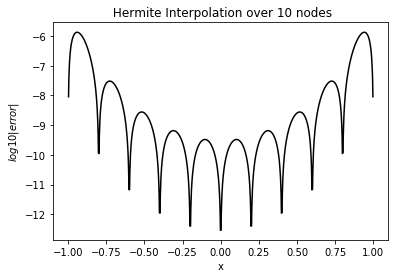

In [19]:
n = 10
plot_hermite(n, xinterp, ftrue)

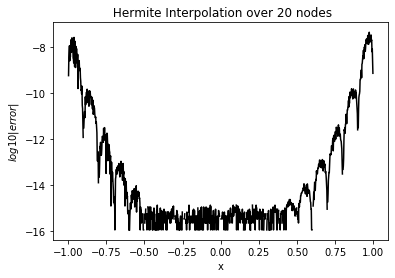

In [20]:
n = 20
plot_hermite(n, xinterp, ftrue)

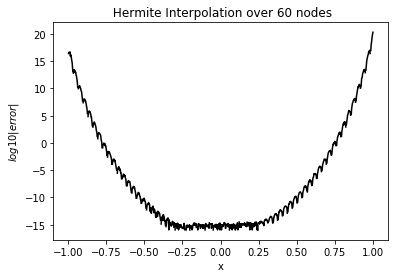

In [21]:
n = 60 
plot_hermite(n, xinterp, ftrue)

Text(0.5, 1.0, ' Hermite Interpolation over 60 nodes, using Chebyshev')

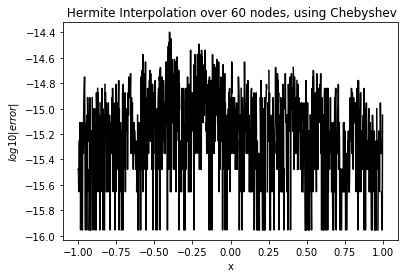

In [22]:
ncheb1 = 60
xinterp1 = np.linspace(-1,1, int(1e3)+1)
ftrue1 = funp3(xinterp1)
ftrue1 = funp3(xinterp1)
xcheb1 = np.cos(np.pi*(2.*np.arange(ncheb1+1)+1.)/(2.*ncheb1+2.))
fcheb1 = funp3(xcheb1)
svals1 = funp3diff(xcheb1)
finterp = hermite(xcheb1,fcheb1, xinterp1, svals1)
plt.plot(xinterp,np.ma.log10(np.abs(ftrue-finterp)),ls='-',color='k')
plt.xlabel("x")
plt.ylabel("$log10|error|$")
txt = " Hermite Interpolation over "
title = txt + str(ncheb1) + " nodes, using Chebyshev"
plt.title(title)

As we can see from the 3 tests above Hermite interpolation using equal spaced does create the issue we see using Lagrande. I tested the method for 10,20,60 ponits of interpolation. At 60 nodes, the log errors does not remain below 0. Hence, Hermite suffers from Runge's phenomenon similarly to Lagrandge when using equispace points.